In [1]:
import numpy as np
import torch 
import pickle
import os
import matplotlib.pyplot as plt
import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.utils.utils_load as load
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data as data

In [2]:
path_configs = '/sequoia/data1/umarteau/Experiments/NIPS2020final/nips_2020_non_negative_model_for_non_negative_functions/npm_nnf/density_estimation/configs_parameter_search'

In [3]:
def plot(a,b,n_plot=10000,save_path = '/sequoia/data1/umarteau/Experiments/NIPS2020final/nips_2020_non_negative_model_for_non_negative_functions/npm_nnf/density_estimation',ds = None,clf = None,fig_file = None,ymin = -0.1,ymax = 0.8):
    n = n_plot//3
    d = ds.X.size(1)
    
    x1 = (b-a)*(2*torch.rand((n,d))-1)/2
    x1[:,0]+= (a+b)/2 
    x2 = ds.sample_from_density(n)
    x3 = torch.zeros((n,d))
    x3[:,0] = (b-a)*(2*torch.rand(n)-1)/2 + (a+b)/2
    xtest = torch.cat([x1,x2,x3],0)
    ytest = clf.predict(xtest)
    xtest_plot = xtest[:,0]

    #print((ytest < 0).sum())
    #print(ytest.sum()*(2*rad)*(2*rad2)**(d-1)/ntest)
    x_train = ds.X
    y_train = clf.predict(x_train)
    
    x_density = torch.zeros((n,d))
    x_density[:,0] = torch.linspace(a,b,n)
    y_density = ds.apply_density(x_density)
    x_density_plot = x_density[:,0]



    fig = plt.figure()
    plt.scatter(xtest_plot,ytest,lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
    plt.plot(x_density_plot,y_density,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
    #plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
    #plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
    plt.legend()
    plt.xlabel("x",fontsize = 20)
    plt.ylabel("p(x)",fontsize = 20)
    plt.ylim(ymin = ymin,ymax = ymax)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    if isinstance(fig_file,str):
        fig.savefig(open(os.path.join(save_path,fig_file),'wb') , format='pdf', dpi=1000)
    plt.show()
def score(clf,ds,n = 1000):
    x_test = ds.sample_from_density(n)
    return clf.score(x_test)

# Our method

In [4]:
config_file = 'config_10d_our_method.json'

In [5]:
clf,ds = load.load(os.path.join(path_configs,config_file))

FileNotFoundError: [Errno 2] No such file or directory: '/sequoia/data1/umarteau/Experiments/NIPS2020final/nips_2020_non_negative_model_for_non_negative_functions/npm_nnf/density_estimation/models/density_estimation_QuadraticEstimator_dimension10_datasetsize1000_1.pickle'

## Visualisation 

2020-10-26 13:29:31,787  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-10-26 13:29:31,828  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-10-26 13:29:31,829  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


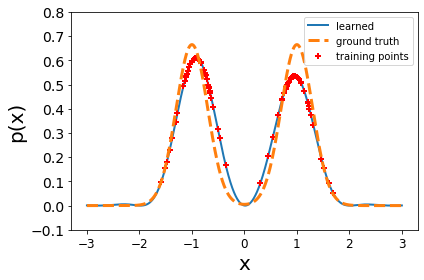

In [117]:
plot(-3.,3.,fig_file = '1d_our_model.pdf',clf = clf,ds = ds)

## Performance

In [118]:
score(clf,ds,n=100000)

tensor(-0.9359)

# Linear method

In [6]:
config_file = 'config_10d_linear_method.json'

In [7]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-11-19 08:06:15,496  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-19 08:06:15,674  matplotlib.backends.backend_pdf DEBUG Embedding font /sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-19 08:06:15,674  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


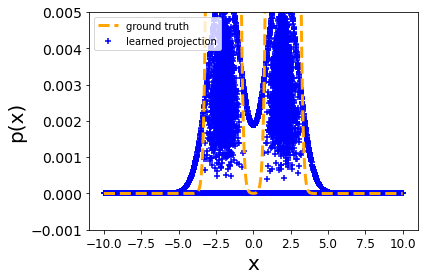

In [9]:
plot(-10,10,fig_file = '10d_linear_model.pdf',clf = clf,ds = ds,ymin = -0.001,ymax = 0.005)

## Performance

In [10]:
score(clf,ds,n=100000)

tensor(-5.9209)

# NCM method

In [11]:
config_file = 'config_10d_nw_method.json'

In [12]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-11-19 08:06:49,927  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-19 08:06:50,026  matplotlib.backends.backend_pdf DEBUG Embedding font /sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-19 08:06:50,027  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


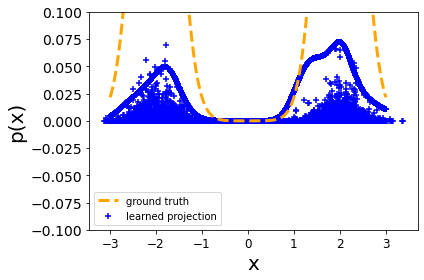

In [13]:
plot(-3,3,fig_file = '10d_nw_model.pdf',clf = clf,ds = ds,ymax = 0.1)

In [14]:
dd = pickle.load(open('models/density_estimation_NadarayaWatsonEstimator_dimension10_datasetsize1000_1.pickle','rb'))

In [15]:
dd

{'best_parameters': {'la': 0.011960296691655974,
  'sigma': 0.23435390048051224,
  'Niter': None,
  'score_param': 'normal',
  'kernel': 'gaussian',
  'c': 0,
  'base': 'gaussian',
  'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'eta_base': 5,
  'eps': 0.001,
  'is_plot': False,
  'al': tensor([[0.0311],
          [0.0305],
          [0.0307],
          [0.0307],
          [0.0305],
          [0.0507],
          [0.0322],
          [0.0341],
          [0.0315],
          [0.0307],
          [0.0308],
          [0.0394],
          [0.0313],
          [0.0306],
          [0.0305],
          [0.0306],
          [0.0316],
          [0.0338],
          [0.0305],
          [0.0327],
          [0.0308],
          [0.0310],
          [0.0310],
          [0.0331],
          [0.0305],
          [0.0307],
          [0.0307],
          [0.0309],
          [0.0397],
          [0.0307],
          [0.0309],
          [0.0305],
          [0.0305],
          [0.0309],
          [0.0361

## Performance

In [16]:
score(clf,ds,n=100000)

tensor(-7.3632)

# GLM method

In [17]:
config_file = 'config_10d_glm_method.json'

In [18]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-11-19 08:07:31,704  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-19 08:07:31,782  matplotlib.backends.backend_pdf DEBUG Embedding font /sequoia/data1/umarteau/miniconda/envs/nips19/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-19 08:07:31,783  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


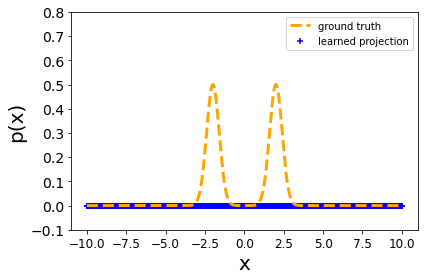

In [19]:
plot(-10,10,fig_file = '10d_glm_model.pdf',clf = clf,ds = ds)

## Performance

In [20]:
score(clf,ds,n=100000)

tensor(-20.7544)